In [1]:
import pandas  as pd
import   numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection   import train_test_split
import pickle
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv('boston.csv')

In [3]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
features_dis=[]
features_con=[]

In [9]:
for feature in data.columns:
    if data[feature].nunique() < 25:   # few unique values → treat as discrete
        features_dis.append(feature)
    else:
        features_con.append(feature)

print("Discrete features:", features_dis)
print("Continuous features:", features_con)


Discrete features: ['chas', 'rad']
Continuous features: ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b', 'lstat', 'medv']


In [10]:
features_dis

['chas', 'rad']

In [11]:
data['chas'].value_counts()

chas
0    471
1     35
Name: count, dtype: int64

In [12]:
data['rad'].value_counts()

rad
24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: count, dtype: int64

C:\Users\MY PC\AppData\Local\Temp\ipykernel_21216\1089796551.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="rad", y="medv", data=data, palette="Set2")


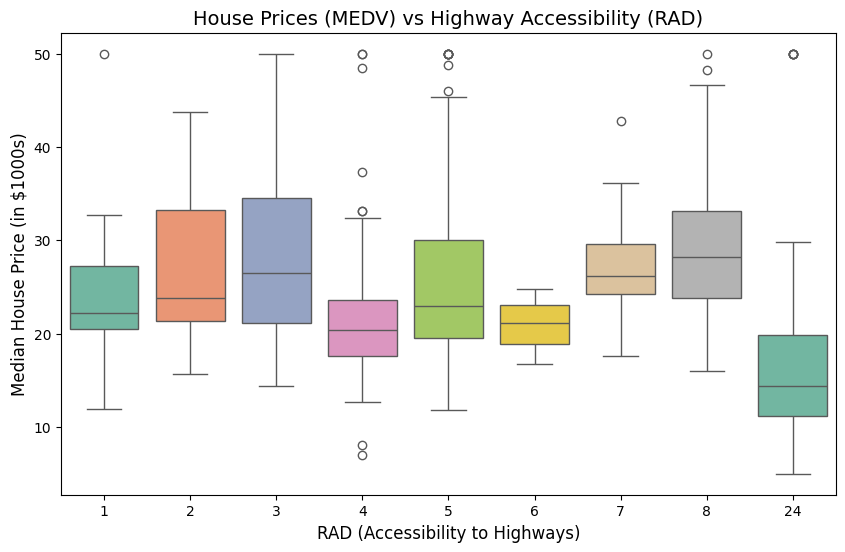

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x="rad", y="medv", data=data, palette="Set2")

plt.title("House Prices (MEDV) vs Highway Accessibility (RAD)", fontsize=14)
plt.xlabel("RAD (Accessibility to Highways)", fontsize=12)
plt.ylabel("Median House Price (in $1000s)", fontsize=12)
plt.show()

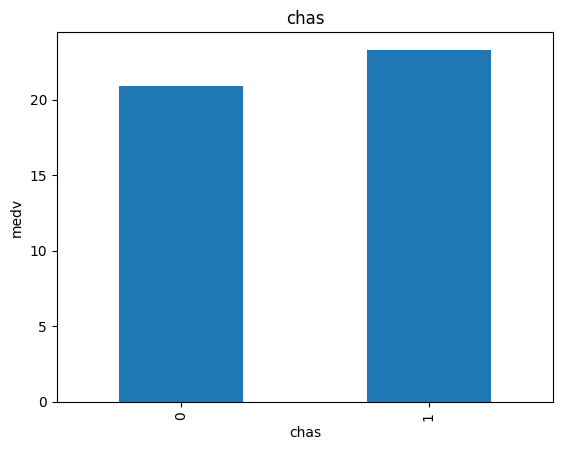

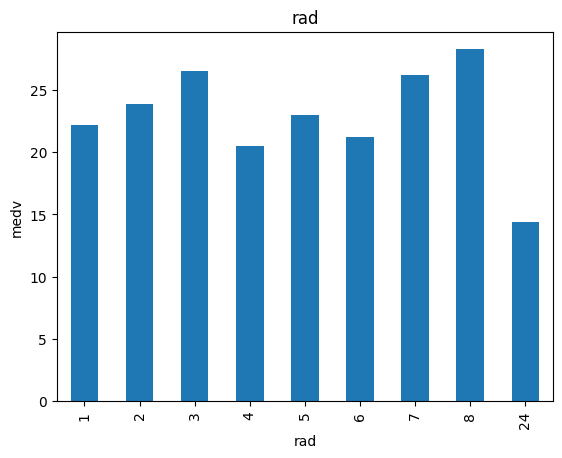

In [14]:
for feature in features_dis:
    dataset=data.copy()
    dataset.groupby(feature)['medv'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('medv')
    plt.title(feature)
    plt.show()

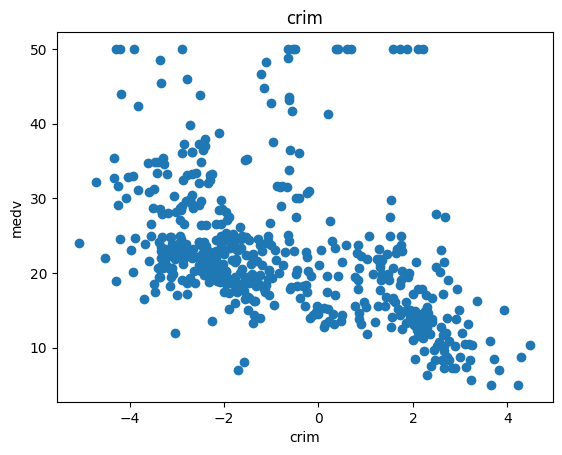

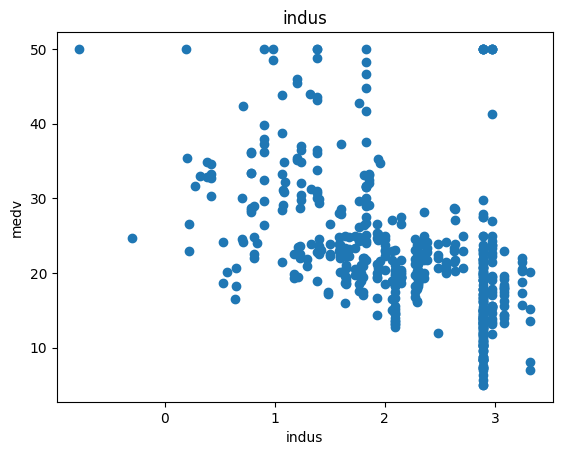

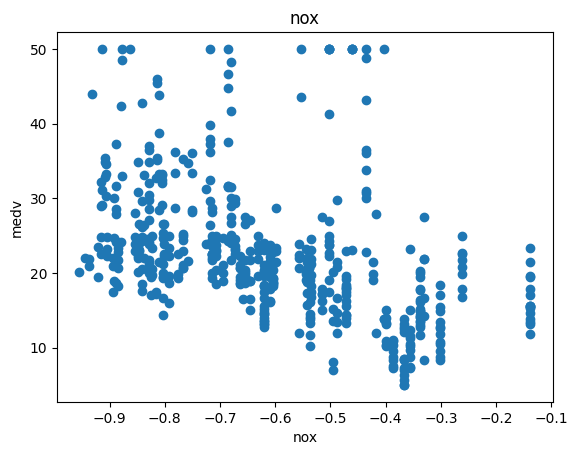

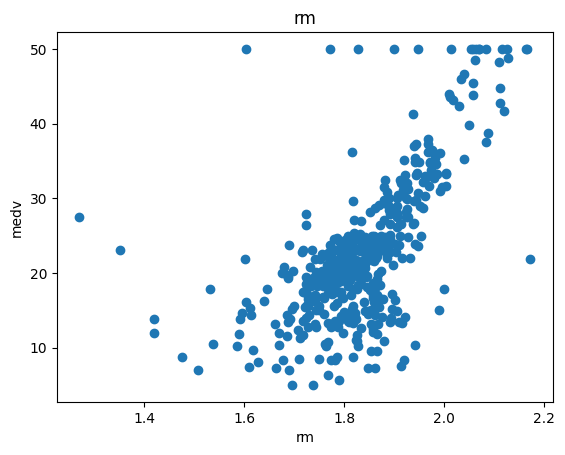

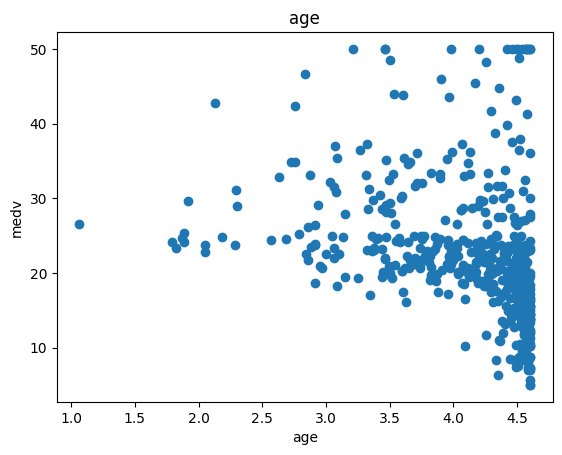

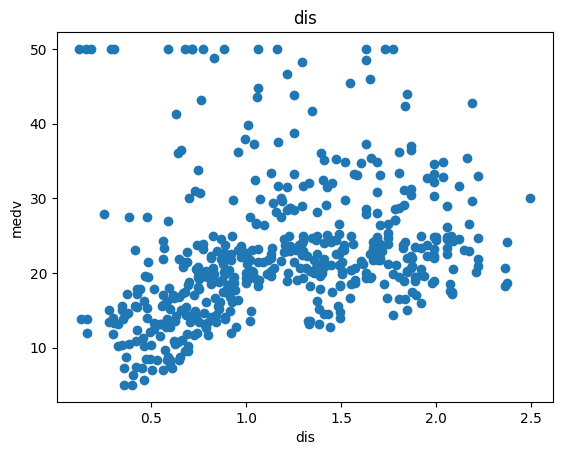

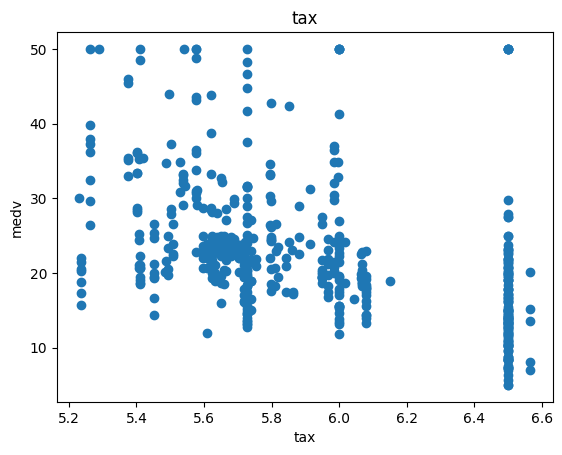

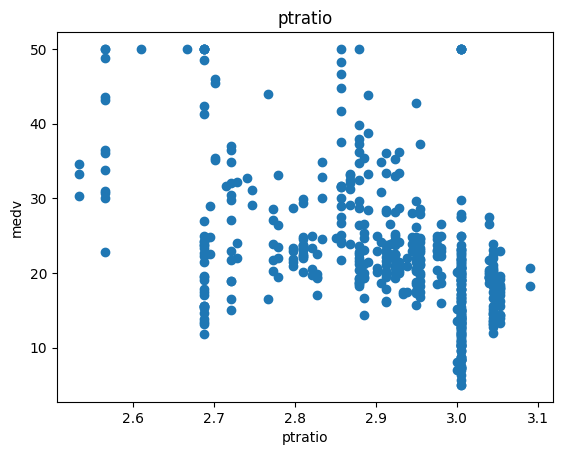

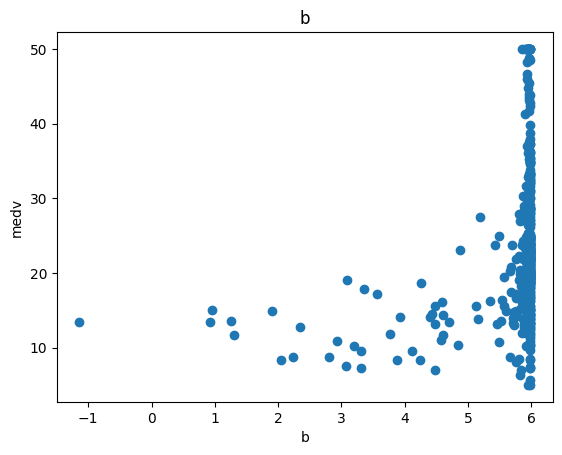

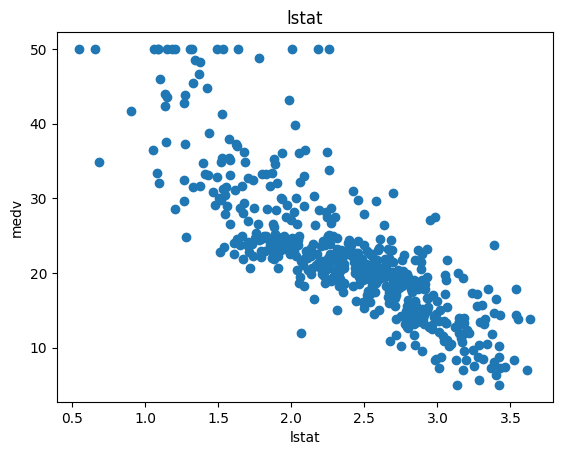

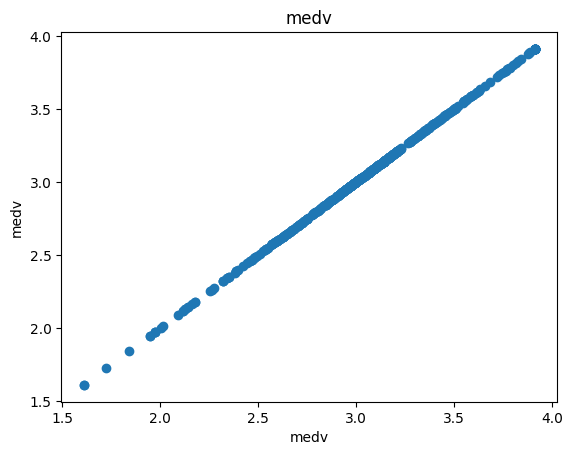

In [15]:
for feature in features_con:
    dataset=data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        dataset['SalePrice']=np.log(dataset['medv'])
        plt.scatter(dataset[feature],dataset['medv'])
        plt.xlabel(feature)
        plt.ylabel('medv')
        plt.title(feature)
        plt.show()


<Figure size 800x500 with 0 Axes>

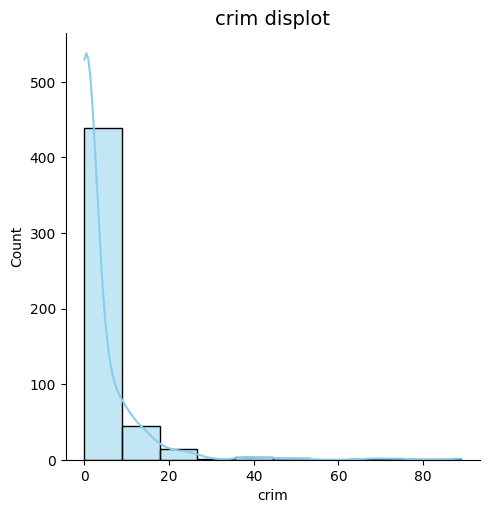

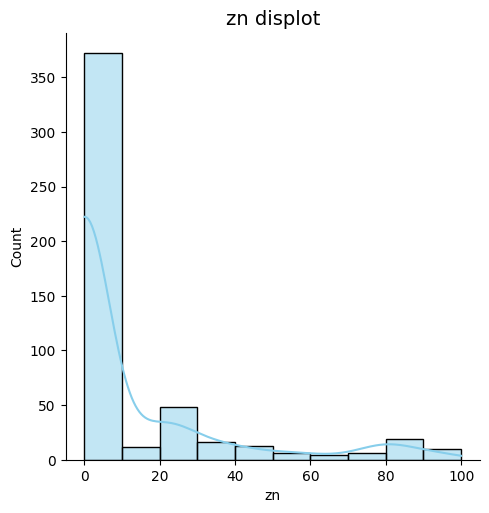

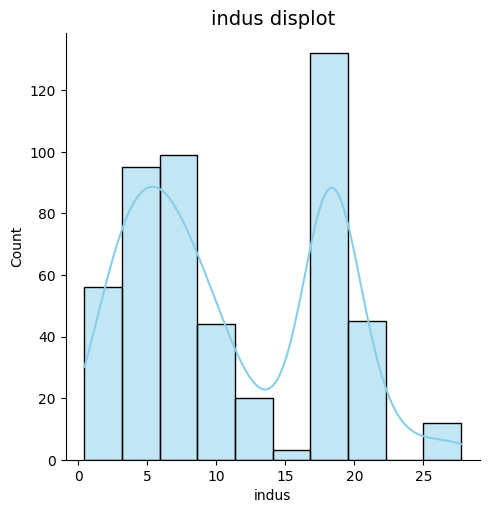

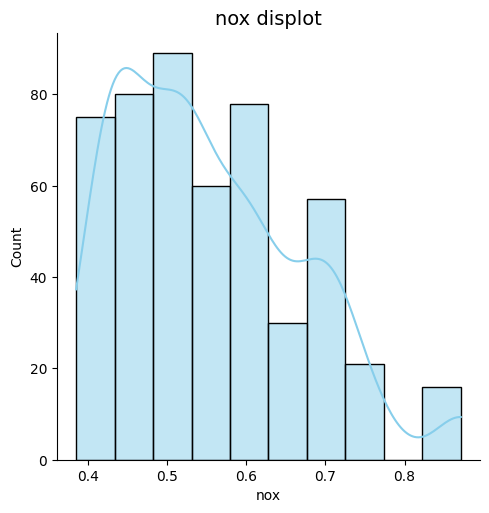

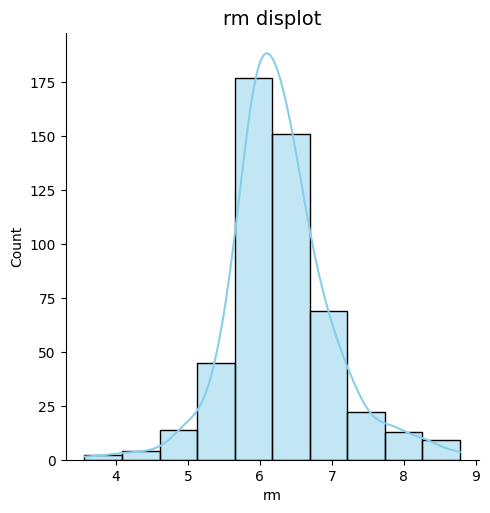

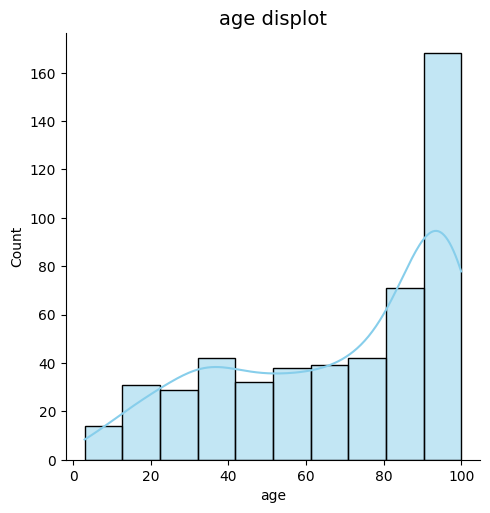

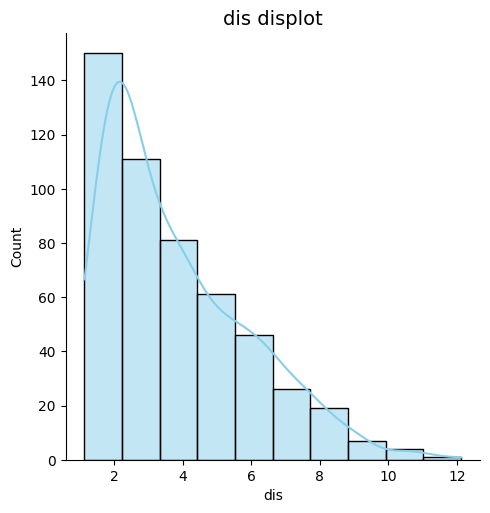

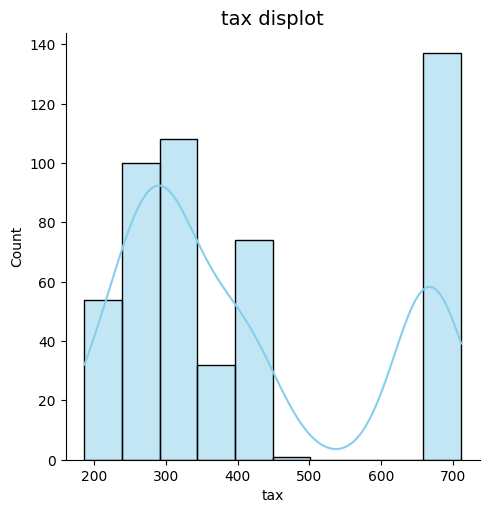

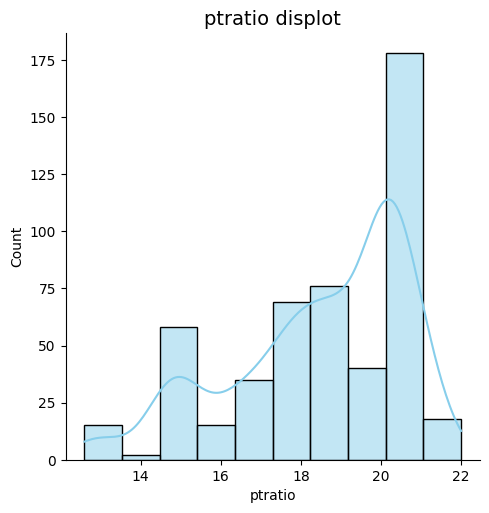

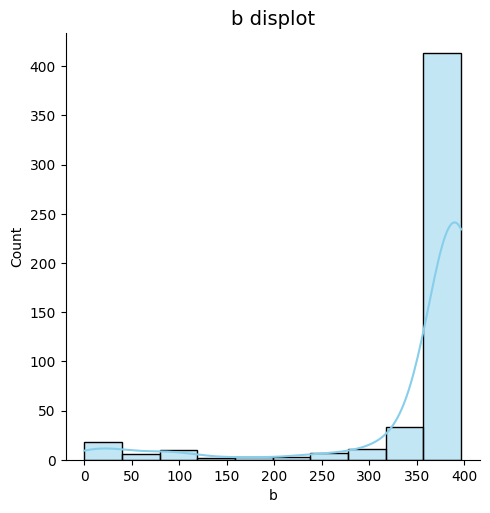

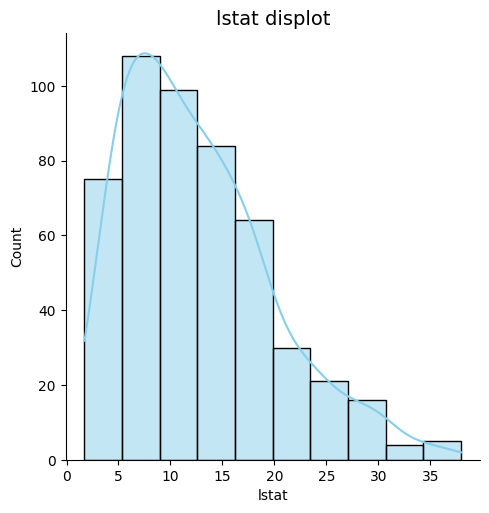

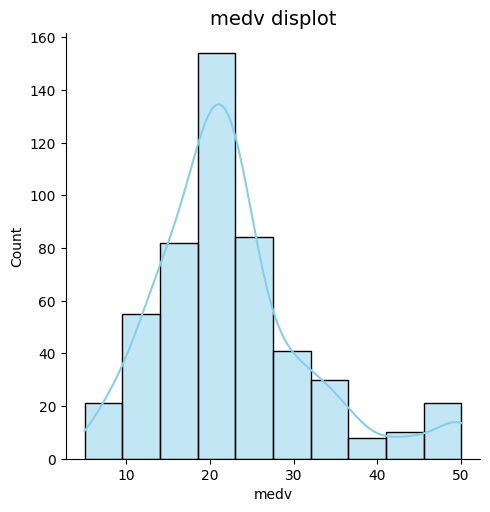

In [16]:
plt.figure(figsize=(8,5))
for features in features_con:
    sns.displot(x=features, data=data,kde=True, bins=10, color='skyblue', edgecolor='black')
    plt.title(f"{features} displot", fontsize=14)
    plt.show()

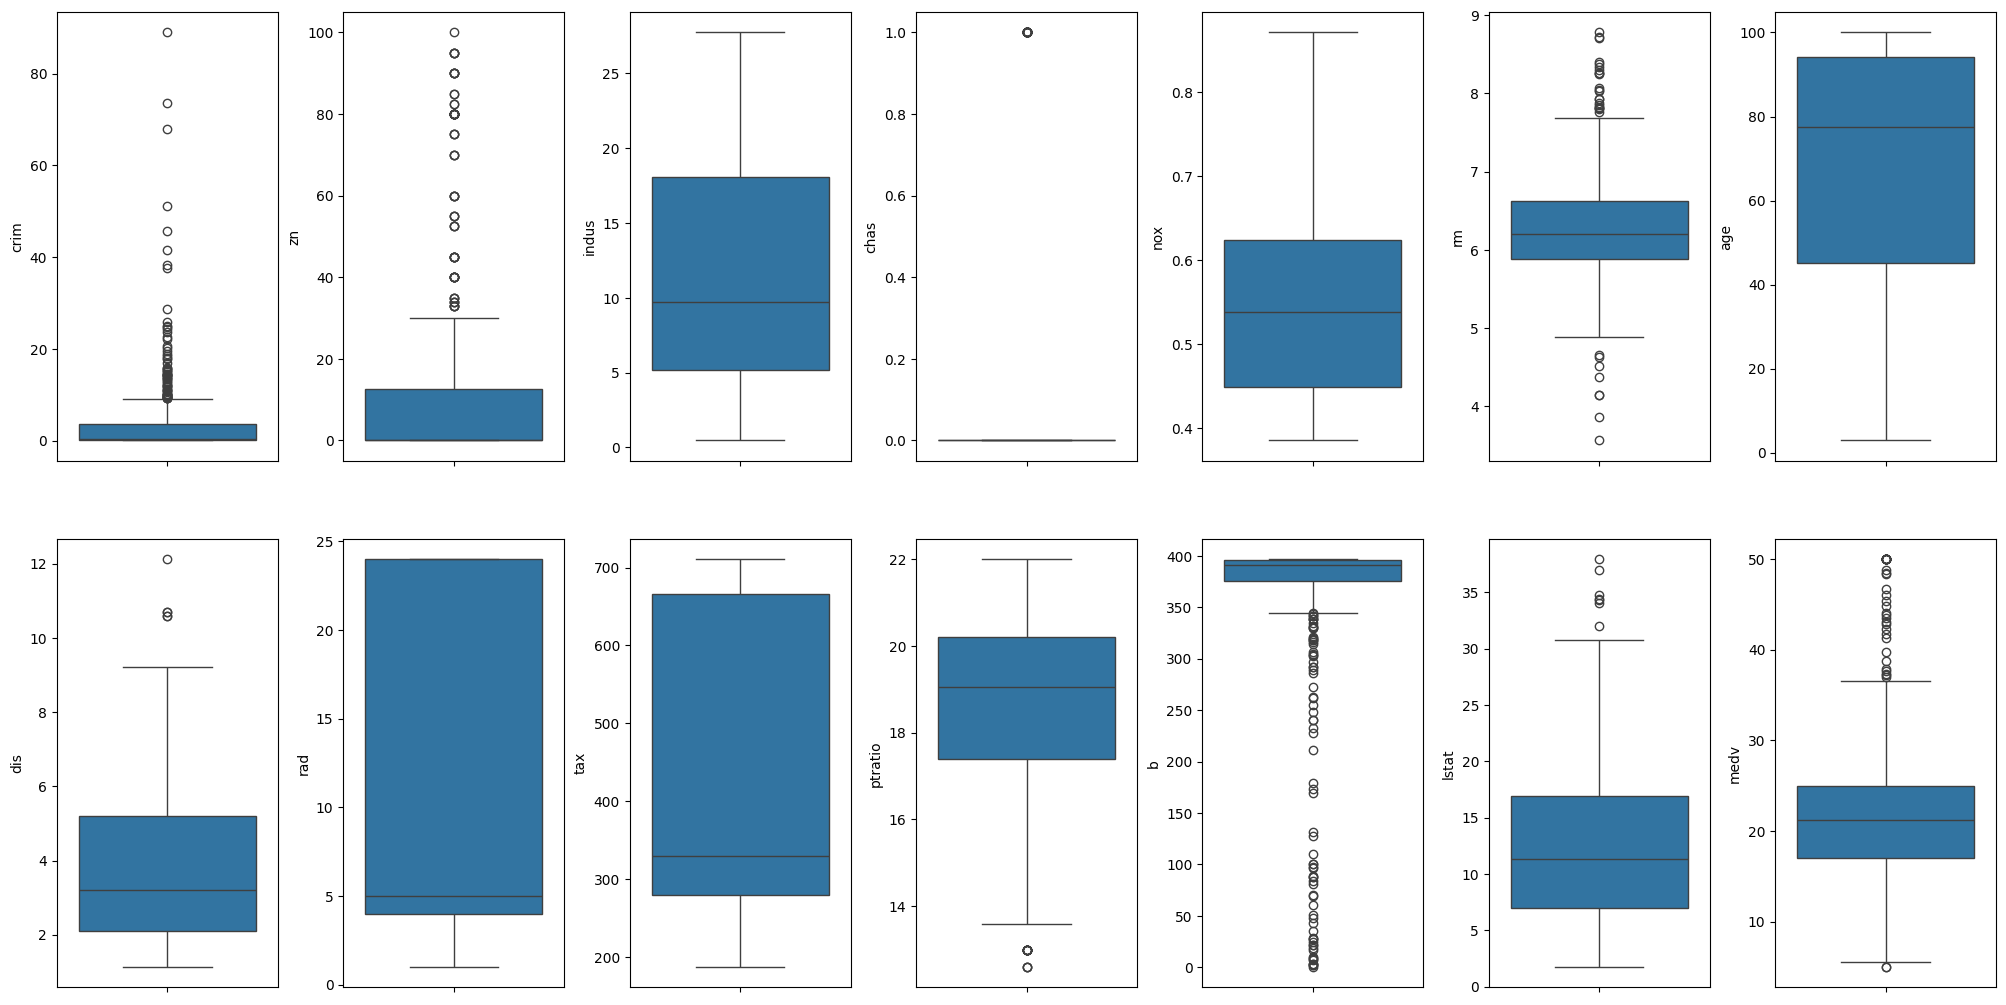

In [17]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    if col != 'type':
        sns.boxplot(y=col, data=data, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Figure size 800x500 with 0 Axes>

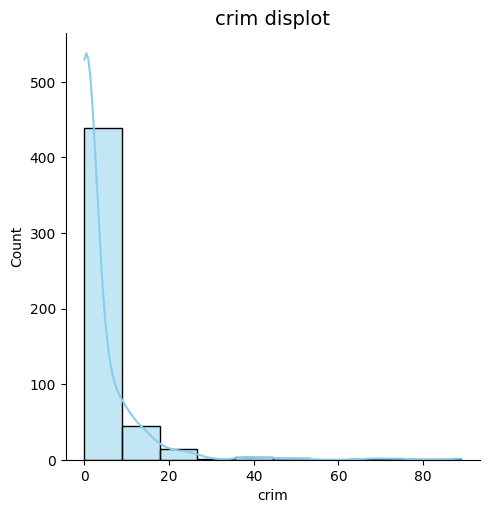

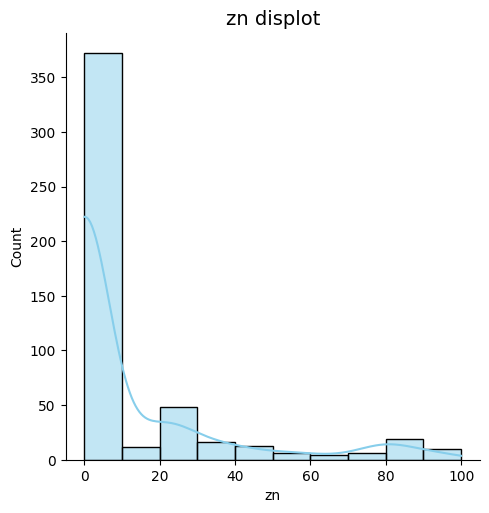

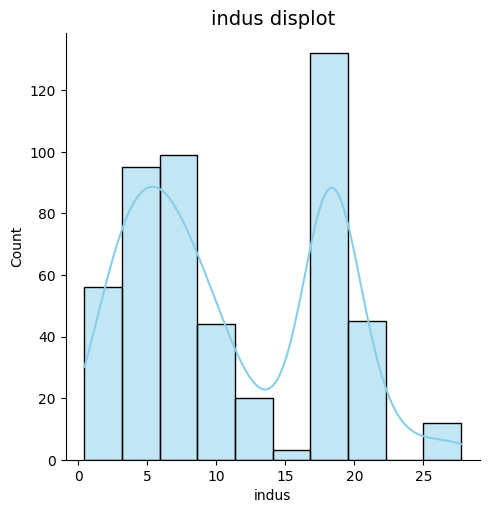

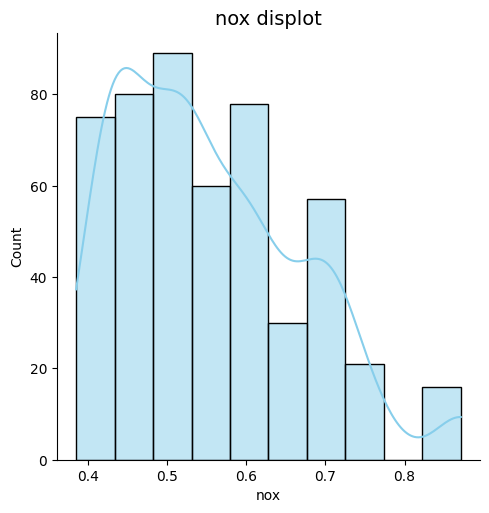

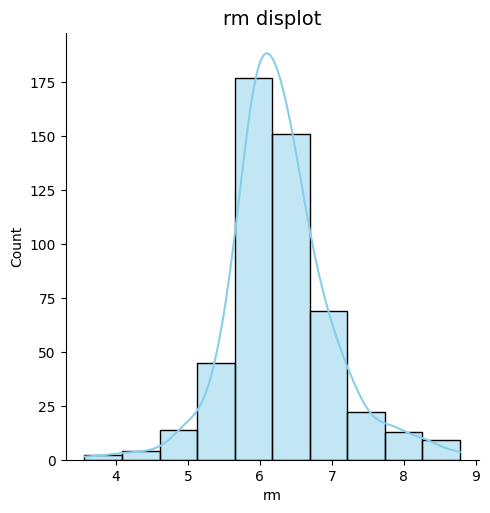

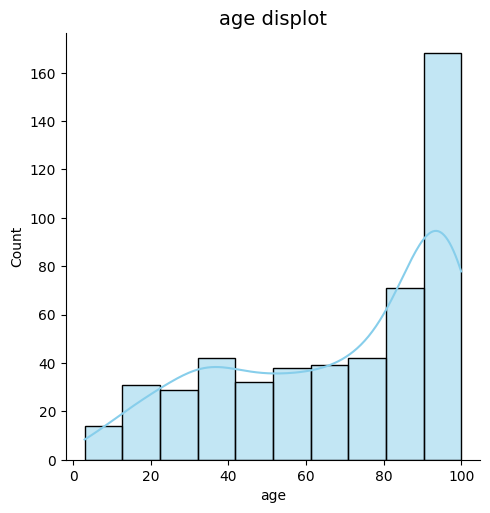

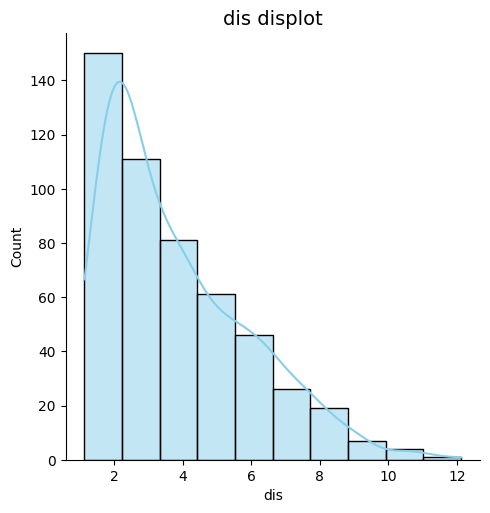

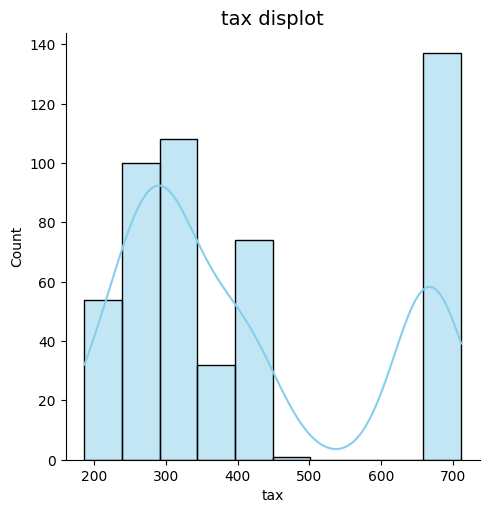

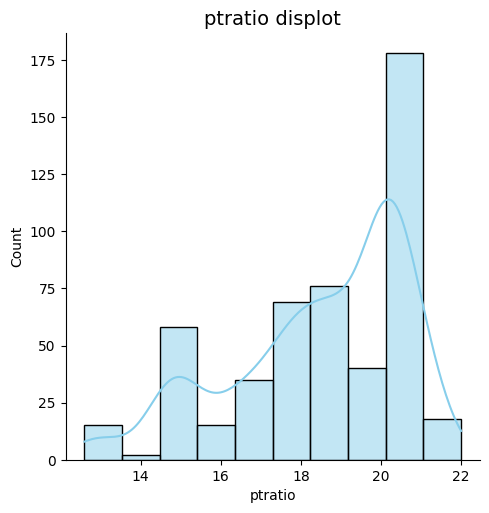

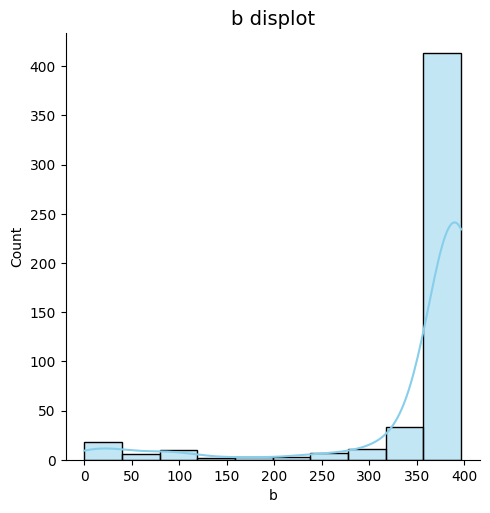

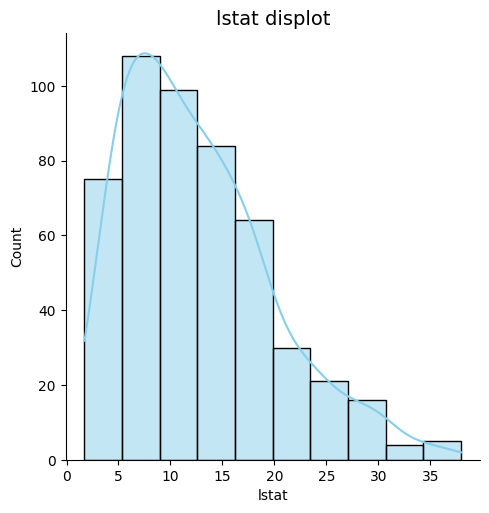

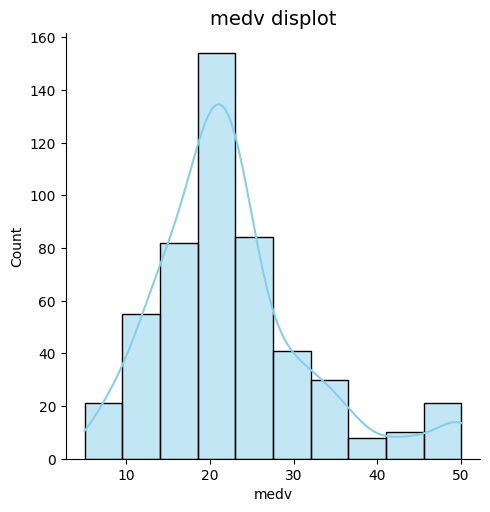

In [18]:
plt.figure(figsize=(8,5))
for features in features_con:
    sns.displot(x=features, data=data,kde=True, bins=10, color='skyblue', edgecolor='black')
    plt.title(f"{features} displot", fontsize=14)
    plt.show()

In [19]:
X=data.drop('medv',axis=1)
y=data['medv']

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Example DataFrame
X_transformed = X.copy()  # X = your original features

features_dis=[]
features_con=[]
for feature in X_transformed .columns:
    if X_transformed[feature].nunique() < 25:   # few unique values → treat as discrete
        features_dis.append(feature)
    else:
        features_con.append(feature)

print("Discrete features:", features_dis)
print("Continuous features:", features_con)


# PowerTransformer for negative/zero values
pt = PowerTransformer(method='yeo-johnson')

for col in features_con:
    skew_val = X[col].skew()
    
    # Approximately symmetric
    if -0.5 < skew_val < 0.5:
        print(f"No transformation applied to {col}, skew={skew_val:.2f}")
    
    # Moderately positively skewed
    elif 0.5 <= skew_val <= 1:
        if (X[col] >= 0).all():  # safe for log1p
            X_transformed[col] = np.log1p(X[col])
            print(f"Applied log1p to {col}, skew={skew_val:.2f}")
        else:
            # fallback to Yeo-Johnson
            X_transformed[col] = pt.fit_transform(X[[col]])
            print(f"Applied Yeo-Johnson to {col} (contains negative/zero), skew={skew_val:.2f}")
    
    # Highly positively skewed
    elif skew_val > 1:
        if (X[col] >= 0).all():  # safe for log1p
            X_transformed[col] = np.log1p(X[col])
            print(f"Applied log1p (high skew) to {col}, skew={skew_val:.2f}")
        else:
            X_transformed[col] = pt.fit_transform(X[[col]])
            print(f"Applied Yeo-Johnson (high skew, contains negative/zero) to {col}, skew={skew_val:.2f}")
    
    # Moderately negatively skewed
    elif -1 <= skew_val <= -0.5:
        X_transformed[col] = pt.fit_transform(X[[col]])
        print(f"Applied Yeo-Johnson (moderate negative skew) to {col}, skew={skew_val:.2f}")
    
    # Highly negatively skewed
    elif skew_val < -1:
        X_transformed[col] = pt.fit_transform(X[[col]])
        print(f"Applied Yeo-Johnson (high negative skew) to {col}, skew={skew_val:.2f}")


Discrete features: ['chas', 'rad']
Continuous features: ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b', 'lstat']
Applied log1p (high skew) to crim, skew=5.22
Applied log1p (high skew) to zn, skew=2.23
No transformation applied to indus, skew=0.30
Applied log1p to nox, skew=0.73
No transformation applied to rm, skew=0.40
Applied Yeo-Johnson (moderate negative skew) to age, skew=-0.60
Applied log1p (high skew) to dis, skew=1.01
Applied log1p to tax, skew=0.67
Applied Yeo-Johnson (moderate negative skew) to ptratio, skew=-0.80
Applied Yeo-Johnson (high negative skew) to b, skew=-2.89
Applied log1p to lstat, skew=0.91


<Figure size 800x500 with 0 Axes>

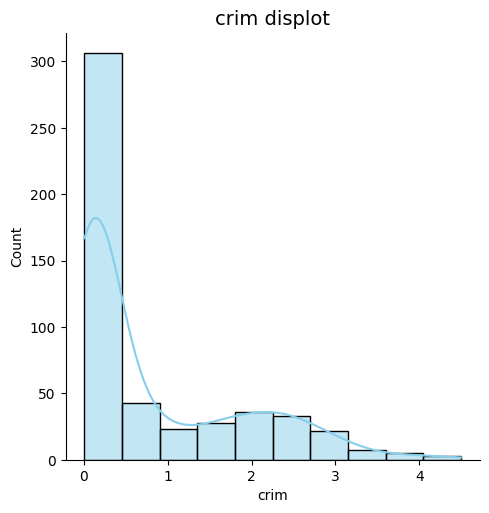

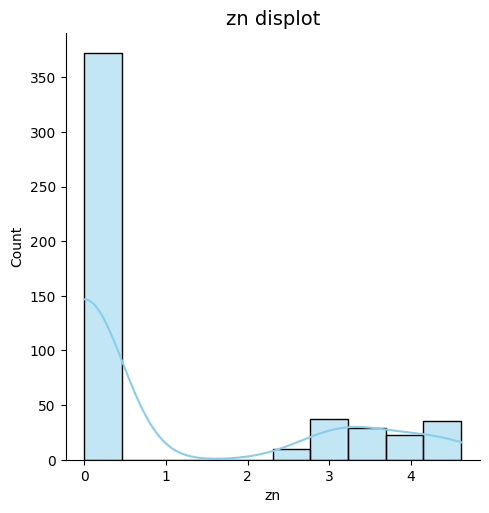

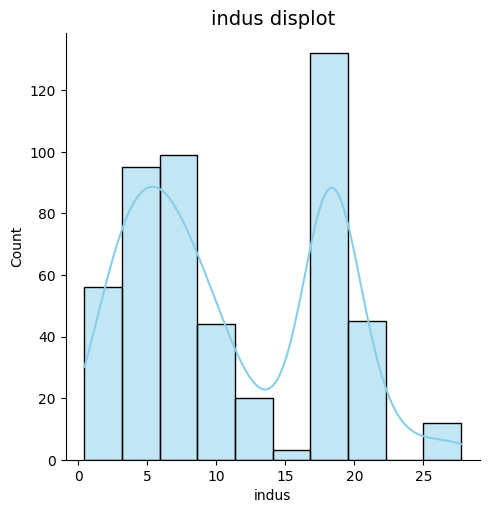

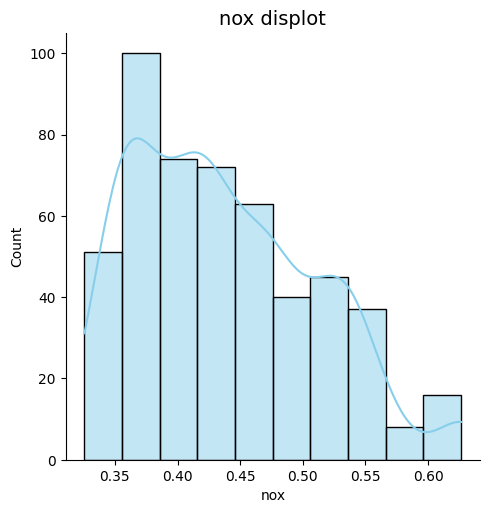

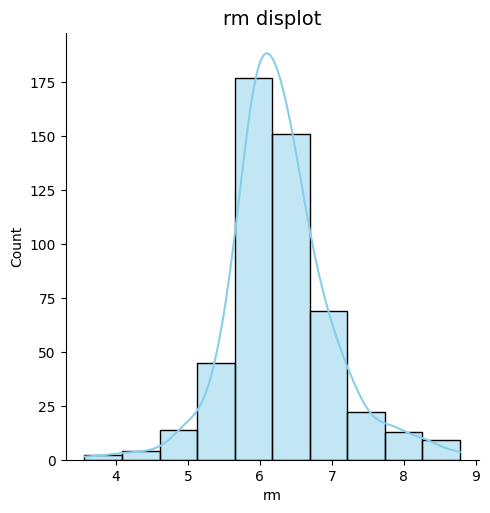

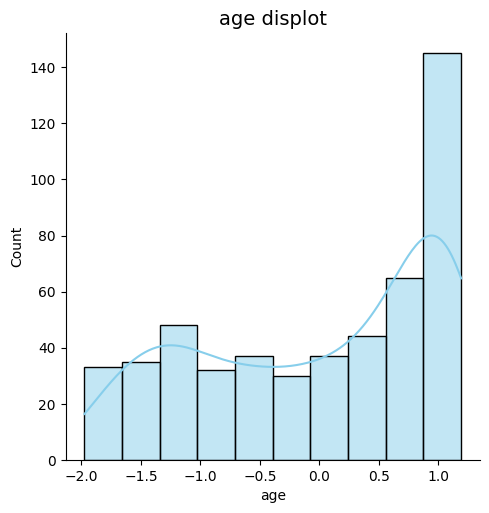

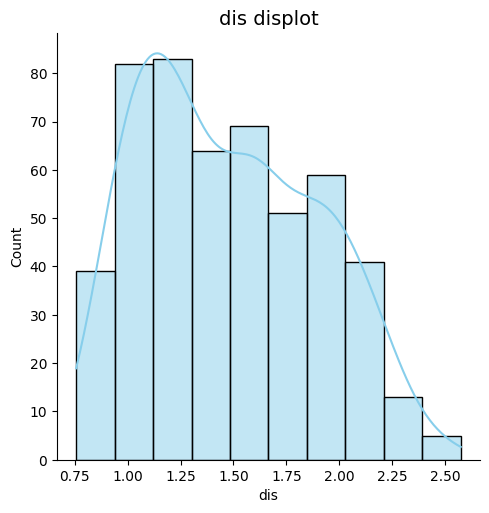

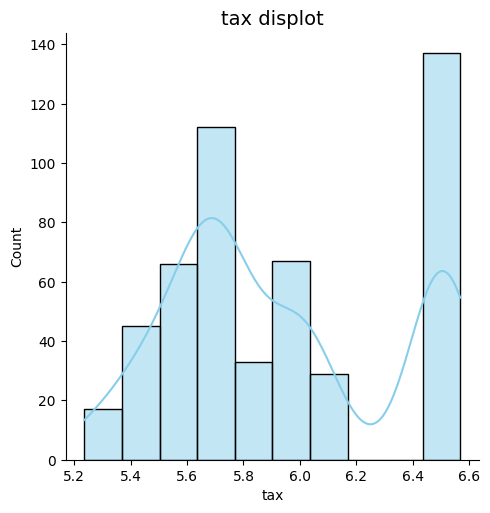

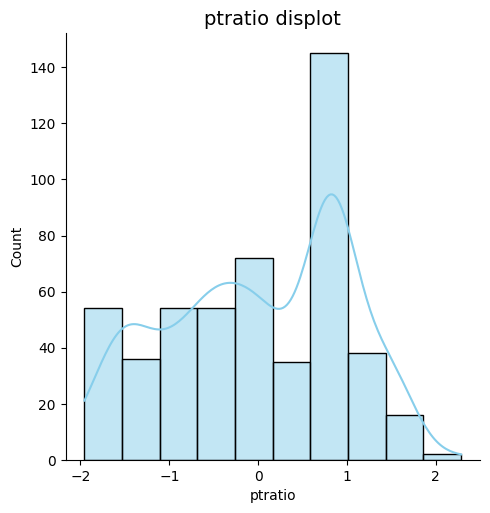

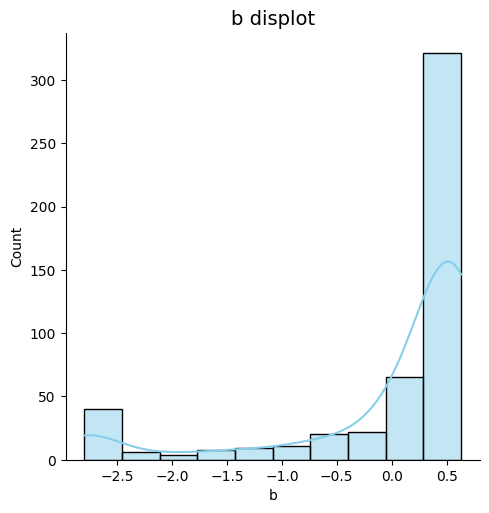

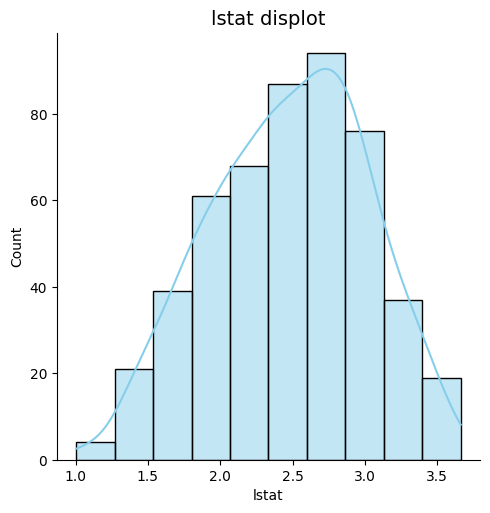

In [21]:
plt.figure(figsize=(8,5))
for features in features_con:
    sns.displot(x=features, data=X_transformed,kde=True, bins=10, color='skyblue', edgecolor='black')
    plt.title(f"{features} displot", fontsize=14)
    plt.show()

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Feature Scaling for models sensitive to feature magnitude
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models and their GridSearchCV parameters
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10, 100],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
            'fit_intercept': [True, False]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10],
            'max_iter': [1000, 5000, 10000],
            'fit_intercept': [True, False]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
            'max_depth': [None, 5, 10, 20,7,8,9,10,11,12,13,14,15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'max_features': [None, 'sqrt', 'log2']
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 500],
            'criterion': ['squared_error', 'absolute_error'],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10,3,6,8,9],
            'min_samples_leaf': [1, 2, 5,4,6,7,4],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    }
}

# Dictionary to store best models
best_models = {}

# GridSearchCV loop
for name, mp in models.items():
    print(f"Training {name}...")
    
    # For linear models, use scaled data; tree-based models don't need scaling
    if name in ['LinearRegression', 'Ridge', 'Lasso']:
        X_train_model, X_test_model = X_train_scaled, X_test_scaled
    else:
        X_train_model, X_test_model = X_train, X_test
    
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train_model, y_train)
    
    best_models[name] = grid.best_estimator_
    
    y_pred = grid.predict(X_test_model)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    
    print(f"{name} Best Params: {grid.best_params_}")
    print(f"{name} R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}\n")

print("All models trained and evaluated successfully!")

Training LinearRegression...
LinearRegression Best Params: {'fit_intercept': True}
LinearRegression R²: 0.7400, MAE: 2.9632, RMSE: 19.0698

Training Ridge...
Ridge Best Params: {'alpha': 1, 'fit_intercept': True, 'solver': 'svd'}
Ridge R²: 0.7396, MAE: 2.9536, RMSE: 19.0982

Training Lasso...
Lasso Best Params: {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 1000}
Lasso R²: 0.7391, MAE: 2.9544, RMSE: 19.1355

Training DecisionTree...
DecisionTree Best Params: {'criterion': 'absolute_error', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTree R²: 0.6705, MAE: 2.9936, RMSE: 24.1666

Training RandomForest...


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define your best parameters for each model
best_params = {
    'LinearRegression': {'fit_intercept': True, 'copy_X': True, 'positive': False},
    'Ridge': {'alpha': 1, 'solver': 'svd', 'fit_intercept': True, 'max_iter': 1000},
    'Lasso': {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 1000, 'positive': False},
    'DecisionTree': {'criterion': 'absolute_error', 'max_depth': 12, 'min_samples_split': 2,
                     'min_samples_leaf': 5, 'max_features': 'sqrt' },
    'RandomForest': {'n_estimators': 500, 'criterion': 'absolute_error', 'max_depth': None,
                     'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
}

# Initialize models with best params
models = {
    'LinearRegression': LinearRegression(**best_params['LinearRegression']),
    'Ridge': Ridge(**best_params['Ridge']),
    'Lasso': Lasso(**best_params['Lasso']),
    'DecisionTree': DecisionTreeRegressor(**best_params['DecisionTree'], random_state=42),
    'RandomForest': RandomForestRegressor(**best_params['RandomForest'], random_state=42)
}

# Store results
results = []

for name, model in models.items():
    print(f"\nTraining {name} with best parameters...")
    
    # Use scaled data for linear models, unscaled for tree-based models
    if name in ['LinearRegression', 'Ridge', 'Lasso']:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test
    
    # Fit model
    model.fit(X_tr, y_train)
    
    # Predict
    y_pred = model.predict(X_te)
    
    # Evaluate
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Save results
    results.append({
        'Model': name,
        'R²': round(r2, 4),
        'MAE': round(mae, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4)
    })
    
    # Print errors
    print(f"{name} Evaluation on Test Data:")
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

# Summary table
results_df = pd.DataFrame(results)
print("\n✅ Summary of all models on Test Data:")
print(results_df.to_string(index=False))


Training LinearRegression with best parameters...
LinearRegression Evaluation on Test Data:
R²: 0.7400
MAE: 2.9632
MSE: 19.0698
RMSE: 4.3669

Training Ridge with best parameters...
Ridge Evaluation on Test Data:
R²: 0.7396
MAE: 2.9536
MSE: 19.0982
RMSE: 4.3701

Training Lasso with best parameters...
Lasso Evaluation on Test Data:
R²: 0.7391
MAE: 2.9544
MSE: 19.1355
RMSE: 4.3744

Training DecisionTree with best parameters...
DecisionTree Evaluation on Test Data:
R²: 0.6962
MAE: 3.3941
MSE: 22.2791
RMSE: 4.7201

Training RandomForest with best parameters...
RandomForest Evaluation on Test Data:
R²: 0.8642
MAE: 1.9905
MSE: 9.9615
RMSE: 3.1562

✅ Summary of all models on Test Data:
           Model     R²    MAE     MSE   RMSE
LinearRegression 0.7400 2.9632 19.0698 4.3669
           Ridge 0.7396 2.9536 19.0982 4.3701
           Lasso 0.7391 2.9544 19.1355 4.3744
    DecisionTree 0.6962 3.3941 22.2791 4.7201
    RandomForest 0.8642 1.9905  9.9615 3.1562


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Assuming X_transformed and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Expanded models and parameters
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            'copy_X': [True, False],
            'positive': [True, False]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 200],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
            'fit_intercept': [True, False],
            'max_iter': [1000, 5000, 10000]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
            'max_iter': [1000, 5000, 10000, 20000],
            'fit_intercept': [True, False],
            'positive': [True, False]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'max_depth': [None, 5, 10, 15, 20, 25, 30],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4, 5, 10],
            'max_features': [None, 'auto', 'sqrt', 'log2']
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 500, 800, 1000],
            'criterion': ['squared_error', 'absolute_error', 'poisson'],
            'max_depth': [None, 10, 20, 30, 50],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4, 5, 10],
            'max_features': ['auto', 'sqrt', 'log2', None],
            'bootstrap': [True, False]
        }
    }
}

# Store best models
best_models = {}

# GridSearchCV loop
for name, mp in models.items():
    print(f"Training {name}...")

    # Scaled data for linear models; unscaled for tree models
    if name in ['LinearRegression', 'Ridge', 'Lasso']:
        X_train_model, X_test_model = X_train_scaled, X_test_scaled
    else:
        X_train_model, X_test_model = X_train, X_test

    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train_model, y_train)

    best_models[name] = grid.best_estimator_

    y_pred = grid.predict(X_test_model)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)

    print(f"{name} Best Params: {grid.best_params_}")
    print(f"{name} R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}\n")

print("All models trained and evaluated successfully!")
